Using TensorFlow backend.
/Users/francescomosconi/anaconda/envs/test/lib/python2.7/site-packages/keras/utils/np_utils.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y = np.zeros((len(y), nb_classes))
/Users/francescomosconi/anaconda/envs/test/lib/python2.7/site-packages/keras/utils/np_utils.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i]] = 1.


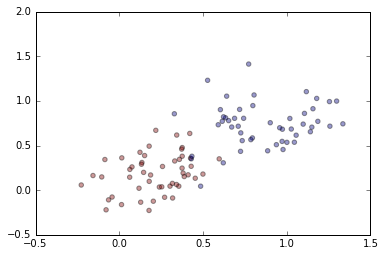

Epoch 1/20
75/75 [==============================] - 0s - loss: 0.2452 - acc: 0.6133     
Epoch 2/20
75/75 [==============================] - 0s - loss: 0.2298 - acc: 0.6667     
Epoch 3/20
75/75 [==============================] - 0s - loss: 0.2164 - acc: 0.7200     
Epoch 4/20
75/75 [==============================] - 0s - loss: 0.2049 - acc: 0.7867     
Epoch 5/20
75/75 [==============================] - 0s - loss: 0.1950 - acc: 0.8000     
Epoch 6/20
75/75 [==============================] - 0s - loss: 0.1860 - acc: 0.8533     
Epoch 7/20
75/75 [==============================] - 0s - loss: 0.1780 - acc: 0.8933     
Epoch 8/20
75/75 [==============================] - 0s - loss: 0.1711 - acc: 0.8933     
Epoch 9/20
75/75 [==============================] - 0s - loss: 0.1631 - acc: 0.9067     
Epoch 10/20
75/75 [==============================] - 0s - loss: 0.1566 - acc: 0.9333     
Epoch 11/20
75/75 [==============================] - 0s - loss: 0.1511 - acc: 0.9200     
Epoch 12/20
75/75 [

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


def generate_separable_dataset(num=(50, 50)):
    a = np.random.multivariate_normal([.2, .2], [[.05, 0], [0, .05]], num[0])
    b = np.random.multivariate_normal([.8, .8], [[.05, 0], [0, .05]], num[1])
    X = np.vstack((a, b))
    labels = np.hstack((np.zeros(50), np.ones(50)))
    return X, np_utils.to_categorical(labels)

X, y = generate_separable_dataset()
plt.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)
plt.show()


model = Sequential()
model.add(Dense(2, input_dim=2, init='uniform'))
model.add(Activation('softmax'))
sgd = SGD(lr=0.2)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=["accuracy"])


X_train, X_test, y_train, y_test = train_test_split(X, y)

model.fit(X_train, y_train, nb_epoch=20, batch_size=16)
print model.evaluate(X_test, y_test, batch_size=16)

